In [1]:
import pandas as pd
import os
import nltk
from nltk import ngrams
from nltk import tokenize
import numpy as np
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
from itertools import chain, zip_longest

In [2]:
cwd = os.getcwd() 
cwd

'/home/daphnaspira/birthing_experiences/src/notebooks'

In [3]:
birth_stories_df = pd.DataFrame()
for file in os.listdir("../../../BabyBumps/submissions/"):
    post = "../../../BabyBumps/submissions/"+file
    if os.path.getsize(post) > 55:
        content = pd.read_json(post)
        birth_stories_df = birth_stories_df.append(content)

In [4]:
#only birth stories
def birthstories(series):
    lowered = series.lower()
    if 'birth story' in lowered:
        return True
    if 'birth stories' in lowered:
        return True
    else:
        return False

birth_stories_df['birth story'] = birth_stories_df['title'].apply(birthstories)
birth_stories_df = birth_stories_df[birth_stories_df['birth story'] == True]
birth_stories_df

,archived,author,author_flair_text,author_flair_type,author_fullname,category,comment_limit,content_categories,created_utc,crosspost_parent,...,score,selftext,subreddit,subreddit_id,thumbnail,title,url,ups,upvote_ratio,birth story
31,NaN,LoveShinyThings,NaN,NaN,t2_dbjmw,NaN,NaN,NaN,1407478091,NaN,...,NaN,Hallo! I lurk a lot and absolutely love readin...,BabyBumps,t5_2s7cl,NaN,Australian FTM looking for non-medicated birth...,NaN,NaN,NaN,True
40,NaN,bumblebeerose,NaN,NaN,t2_6oz0x,NaN,NaN,NaN,1407498840,NaN,...,NaN,"Tl;dr Baby pictures!\n\n[Chillin' out, maxin' ...",BabyBumps,t5_2s7cl,NaN,Willow's Birth Story [Quite long!],NaN,NaN,NaN,True
117,NaN,undermoonandstar,NaN,NaN,t2_dwgo3,NaN,NaN,NaN,1407548377,NaN,...,NaN,"This is novel worthy so TL/DR: 41 weeks, thoug...",BabyBumps,t5_2s7cl,NaN,Catherine's Birth Story! 8/5/14,NaN,NaN,NaN,True
121,NaN,HoppyLady,NaN,NaN,t2_e3ze0,NaN,NaN,NaN,1407551228,NaN,...,NaN,Baby Alton has arrived! \n\nHe was born Aug 6 ...,BabyBumps,t5_2s7cl,NaN,"Birth Story, overdue, vaginal, no meds, fast, ...",NaN,NaN,NaN,True
187,NaN,[deleted],NaN,NaN,None,NaN,NaN,NaN,1407616060,NaN,...,NaN,I cannot believe I am one day shy of 3 weeks p...,BabyBumps,t5_2s7cl,NaN,Today was supposed to be my dues date. So I de...,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,NaN,geckosandwine,NaN,NaN,t2_12yi10,NaN,NaN,NaN,1565235402,NaN,...,NaN,Hi everyone!\n\nI never really got far enough ...,BabyBumps,t5_2s7cl,NaN,"Birth Story - 25w6, emergency c-section, positive",NaN,NaN,NaN,True
512,NaN,PotatoPeelToasted,NaN,NaN,t2_40g3ufxn,NaN,NaN,NaN,1565256565,NaN,...,NaN,My LO is now 4 months old having a bit of feve...,BabyBumps,t5_2s7cl,NaN,Birth Story - 38+4 The happy c-section,NaN,NaN,NaN,True
551,NaN,youre_a_wizard_baby,NaN,NaN,t2_par10,NaN,NaN,NaN,1565292154,NaN,...,NaN,,BabyBumps,t5_2s7cl,NaN,"Guinevere Lilith - Born at 37+6, 6lb 7oz, 3 ho...",NaN,NaN,NaN,True
556,NaN,thisisjanx,NaN,NaN,t2_luz94,NaN,NaN,NaN,1565298444,NaN,...,NaN,Well after a week I finally have time to write...,BabyBumps,t5_2s7cl,NaN,"Birth Story: urgent c section, unplanned",NaN,NaN,NaN,True


In [5]:
#gets rid of posts that have no content
nan_value = float("NaN")
birth_stories_df.replace("", nan_value, inplace=True)
birth_stories_df.dropna(subset=['selftext'], inplace=True)

In [6]:
#only stories 500 words or longer
def story_lengths(series):
    lowered = series.lower()
    tokenized = nltk.word_tokenize(lowered)
    length = len(tokenized)
    return length

birth_stories_df['story length'] = birth_stories_df['selftext'].apply(story_lengths)

def long_stories(series):
    if series >= 500:
        return True
    else:
        return False

birth_stories_df['500+'] = birth_stories_df['story length'].apply(long_stories)
birth_stories_df = birth_stories_df[birth_stories_df['500+'] == True]
birth_stories_df

,archived,author,author_flair_text,author_flair_type,author_fullname,category,comment_limit,content_categories,created_utc,crosspost_parent,...,subreddit,subreddit_id,thumbnail,title,url,ups,upvote_ratio,birth story,story length,500+
40,NaN,bumblebeerose,NaN,NaN,t2_6oz0x,NaN,NaN,NaN,1407498840,NaN,...,BabyBumps,t5_2s7cl,NaN,Willow's Birth Story [Quite long!],NaN,NaN,NaN,True,1212,True
117,NaN,undermoonandstar,NaN,NaN,t2_dwgo3,NaN,NaN,NaN,1407548377,NaN,...,BabyBumps,t5_2s7cl,NaN,Catherine's Birth Story! 8/5/14,NaN,NaN,NaN,True,2295,True
187,NaN,[deleted],NaN,NaN,None,NaN,NaN,NaN,1407616060,NaN,...,BabyBumps,t5_2s7cl,NaN,Today was supposed to be my dues date. So I de...,NaN,NaN,NaN,True,1415,True
191,NaN,drpepperslut,NaN,NaN,t2_9t4ue,NaN,NaN,NaN,1407616985,NaN,...,BabyBumps,t5_2s7cl,NaN,"Today was supposed to be my due date, but I de...",NaN,NaN,NaN,True,1415,True
285,NaN,eelliott86,NaN,NaN,t2_dlgoq,NaN,NaN,NaN,1407698882,NaN,...,BabyBumps,t5_2s7cl,NaN,Penny's birth story!,NaN,NaN,NaN,True,2995,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,NaN,Digzalot,NaN,NaN,t2_b8aaf,NaN,NaN,NaN,1565128524,NaN,...,BabyBumps,t5_2s7cl,NaN,"Birth Story: July 30th, 41 weeks, epidural, va...",NaN,NaN,NaN,True,1717,True
500,NaN,geckosandwine,NaN,NaN,t2_12yi10,NaN,NaN,NaN,1565235402,NaN,...,BabyBumps,t5_2s7cl,NaN,"Birth Story - 25w6, emergency c-section, positive",NaN,NaN,NaN,True,2109,True
512,NaN,PotatoPeelToasted,NaN,NaN,t2_40g3ufxn,NaN,NaN,NaN,1565256565,NaN,...,BabyBumps,t5_2s7cl,NaN,Birth Story - 38+4 The happy c-section,NaN,NaN,NaN,True,1203,True
556,NaN,thisisjanx,NaN,NaN,t2_luz94,NaN,NaN,NaN,1565298444,NaN,...,BabyBumps,t5_2s7cl,NaN,"Birth Story: urgent c section, unplanned",NaN,NaN,NaN,True,985,True


In [7]:
birth_stories_df = birth_stories_df[['author', 'title', 'selftext','story length','created_utc','permalink']]
birth_stories_df

,author,title,selftext,story length,created_utc,permalink
40,bumblebeerose,Willow's Birth Story [Quite long!],"Tl;dr Baby pictures!\n\n[Chillin' out, maxin' ...",1212,1407498840,/r/BabyBumps/comments/2cz0ww/willows_birth_sto...
117,undermoonandstar,Catherine's Birth Story! 8/5/14,"This is novel worthy so TL/DR: 41 weeks, thoug...",2295,1407548377,/r/BabyBumps/comments/2d1ahf/catherines_birth_...
187,[deleted],Today was supposed to be my dues date. So I de...,I cannot believe I am one day shy of 3 weeks p...,1415,1407616060,/r/BabyBumps/comments/2d3em6/today_was_suppose...
191,drpepperslut,"Today was supposed to be my due date, but I de...",I cannot believe I am one day shy of 3 weeks p...,1415,1407616985,/r/BabyBumps/comments/2d3g0j/today_was_suppose...
285,eelliott86,Penny's birth story!,So my birth story took me about 3 weeks to wri...,2995,1407698882,/r/BabyBumps/comments/2d62xl/pennys_birth_story/
...,...,...,...,...,...,...
362,Digzalot,"Birth Story: July 30th, 41 weeks, epidural, va...",I was so afraid to read any birth stories whil...,1717,1565128524,/r/BabyBumps/comments/cmwrtr/birth_story_july_...
500,geckosandwine,"Birth Story - 25w6, emergency c-section, positive",Hi everyone!\n\nI never really got far enough ...,2109,1565235402,/r/BabyBumps/comments/cng2vm/birth_story_25w6_...
512,PotatoPeelToasted,Birth Story - 38+4 The happy c-section,My LO is now 4 months old having a bit of feve...,1203,1565256565,/r/BabyBumps/comments/cnjb6y/birth_story_384_t...
556,thisisjanx,"Birth Story: urgent c section, unplanned",Well after a week I finally have time to write...,985,1565298444,/r/BabyBumps/comments/cns1ty/birth_story_urgen...


**Table 1: Corpus Stats**

In [8]:
#number of stories with more than 500 words
num_stories = len(list(birth_stories_df['selftext']))
num_stories

4079

In [9]:
#average story length
all_story_lengths = list(birth_stories_df['story length'])
average_story_length = np.round(np.mean(all_story_lengths),2)
average_story_length

1472.83

In [10]:
#longest story
max_story_length = max(all_story_lengths)
max_story_length

6817

In [11]:
#number of unique words in the stories
all_unique_words = []
def unique_words(series):
    lowered = series.lower()
    tokenized = nltk.word_tokenize(lowered)
    for word in tokenized:
        if word not in all_unique_words:
            all_unique_words.append(word)
        else:
            continue
            
birth_stories_df['selftext'].apply(unique_words)
num_unique = len(all_unique_words)
num_unique

54298

In [12]:
corpus_stats = {'Stat':['Number of stories with more than 500 words', 'Average number of words per story',
                         'Number of words in longest story', 'Number of unique words'],
               'Number':[num_stories, average_story_length, max_story_length, num_unique]}

In [13]:
table1_df = pd.DataFrame(corpus_stats, index=np.arange(4))
table1_df

,Stat,Number
0,Number of stories with more than 500 words,4079.00
1,Average number of words per story,1472.83
2,Number of words in longest story,6817.00
3,Number of unique words,54298.00


**Figure 1 (left): how many stories appeared in a year**

<ipython-input-14-dbdb8681ce0e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_stories_df['year created'] = birth_stories_df['created_utc'].apply(get_post_year)


<AxesSubplot:>

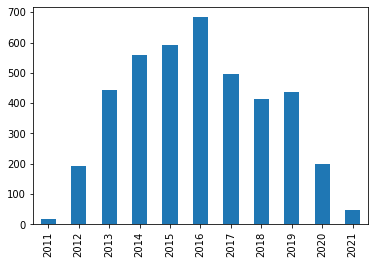

In [14]:
#translate created_utc column into years
def get_post_year(series):
    parsed_date = datetime.utcfromtimestamp(series)
    year = parsed_date.year
    return year

birth_stories_df['year created'] = birth_stories_df['created_utc'].apply(get_post_year)
posts_per_year = birth_stories_df['year created'].value_counts()
posts_per_year.sort_index().plot.bar()

**Figure 1 (right): Distribution of number of stories that had numbers of words**

<AxesSubplot:>

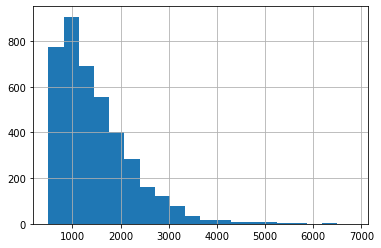

In [15]:
#histogram
birth_stories_df['story length'].hist(bins=20)

**Table 3: Labels**

In [16]:
#creating lists of words used to assign labels to story titles 
positive = ['positive']
not_positive = ['less-than positive']
negative = ['trauma', 'trigger', 'negative']
unmedicated = ['no epi', 'natural', 'unmedicated', 'epidural free', 'no meds', 'no pain meds']
not_unmedicated = ['unnatural']
medicated = ['epidural', 'epi']
not_medicated = ['no epi', 'epidural free']
home = ['home']
hospital = ['hospital']
first = ['ftm', 'first time', 'first pregnancy']
second = ['stm', 'second']
c_section = ['cesarian', 'section', 'caesar']
vaginal = ['vaginal', 'vbac']

In [17]:
#ask Adam
#functions to assign labels to posts based on their titles
def findkey(title, labels):
    x = False
    for label in labels:
        if label in title:
            x = True
    return x

def findkeydisallow(title, labels, notlabels):
    x = False
    for label in labels:
        if label in title:
            for notlabel in notlabels:
                if notlabel in title:
                    return x
                else:
                    x = True
    return x

In [18]:
#applying functions and making a dictionary of the results
positive_count = birth_stories_df['title'].apply(lambda x: findkeydisallow(x,positive, not_positive)).value_counts()[1]
unmedicated_count = birth_stories_df['title'].apply(lambda x: findkeydisallow(x,unmedicated, not_unmedicated)).value_counts()[1]
medicated_count = birth_stories_df['title'].apply(lambda x: findkeydisallow(x,medicated, not_medicated)).value_counts()[1]
negative_count = birth_stories_df['title'].apply(lambda x: findkey(x,negative)).value_counts()[1]
home_count = birth_stories_df['title'].apply(lambda x: findkey(x,home)).value_counts()[1]
hospital_count = birth_stories_df['title'].apply(lambda x: findkey(x,hospital)).value_counts()[1]
first_count = birth_stories_df['title'].apply(lambda x: findkey(x,first)).value_counts()[1]
second_count = birth_stories_df['title'].apply(lambda x: findkey(x,second)).value_counts()[1]
c_section_count = birth_stories_df['title'].apply(lambda x: findkey(x,c_section)).value_counts()[1]
vaginal_count = birth_stories_df['title'].apply(lambda x: findkey(x,vaginal)).value_counts()[1]
labels = { 'Labels': ['Positive', 'Negative', 'Unmedicated', 'Medicated', 'Home', 'Hospital', 'First', 'Second', 'C-section', 'Vaginal'],
          'Description': ['Positively framed', 'Negatively framed', 'Birth without epidural', 'Birth with epidural',
                         'Birth takes place at home', 'Birth takes place at hospital', 'First birth for the author',
                         'Second birth for the author', 'Birth via cesarean delivery', 'Vaginal births'],
          'N-Grams': [positive+not_positive, negative, unmedicated+not_unmedicated, medicated+not_medicated,
                     home, hospital, first, second, c_section, vaginal],
          'Number of Stories': [positive_count, negative_count, unmedicated_count, medicated_count, home_count, hospital_count, 
                                first_count, second_count, c_section_count, vaginal_count]}

In [19]:
table3_df = pd.DataFrame(labels, index=np.arange(10))
table3_df.set_index('Labels')

,Description,N-Grams,Number of Stories
Labels,,,
Positive,Positively framed,"[positive, less-than positive]",668
Negative,Negatively framed,"[trauma, trigger, negative]",237
Unmedicated,Birth without epidural,"[no epi, natural, unmedicated, epidural free, ...",327
Medicated,Birth with epidural,"[epidural, epi, no epi, epidural free]",317
Home,Birth takes place at home,[home],86
Hospital,Birth takes place at hospital,[hospital],209
First,First birth for the author,"[ftm, first time, first pregnancy]",14
Second,Second birth for the author,"[stm, second]",29
C-section,Birth via cesarean delivery,"[cesarian, section, caesar]",395


**Figure 2: Sentiment Analysis**

In [20]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return(sentence, score)

In [22]:
sentiment_df = pd.DataFrame()
sentiment_df['tokenized sentences'] = birth_stories_df['selftext'].apply(tokenize.sent_tokenize)
sentiment_df

,tokenized sentences
40,"[Tl;dr Baby pictures!, [Chillin' out, maxin' o..."
117,"[This is novel worthy so TL/DR: 41 weeks, thou..."
187,[I cannot believe I am one day shy of 3 weeks ...
191,[I cannot believe I am one day shy of 3 weeks ...
285,[So my birth story took me about 3 weeks to wr...
...,...
362,[I was so afraid to read any birth stories whi...
500,"[Hi everyone!, I never really got far enough i..."
512,[My LO is now 4 months old having a bit of fev...
556,[Well after a week I finally have time to writ...


In [23]:
story_sents = tokenize.sent_tokenize(birth_stories_df['selftext'].iloc[1])

In [24]:
#gets sentiment for each sentence and groups sentences into ten equal sections
def split_story_10_sentiment(lst):
    sentiment_story = []
    for sentence in lst:
        if len(tokenize.word_tokenize(sentence)) >=5:
            analyzed = sentiment_analyzer_scores(sentence)
            sentiment_story.append(analyzed)
    rounded_up = int(np.ceil(len(lst)/10))
    remainder = rounded_up*10 %len(lst)
    step_10 = np.arange(0, len(lst)+remainder, rounded_up)
    split_story_sents = []
    for i in step_10:
        split_story_sents.append((sentiment_story[i:i+rounded_up]))
    return split_story_sents

In [25]:
sentiment_df['sentiment groups'] = sentiment_df['tokenized sentences'].apply(split_story_10_sentiment)

In [26]:
#finds the mean sentiment compound score for each of the ten groups in the story
def mean_sentiment(lst):
    compound_scores = []
    for group in lst:
        group_score = []
        for sentence in group:
            dictionary = sentence[1]
            compound_score = dictionary['compound']
            group_score.append(compound_score)
        mean_per_group = np.mean(group_score)
        compound_scores.append(mean_per_group)
    return compound_scores

sentiment_df['10 mean scores per story'] = sentiment_df['sentiment groups'].apply(mean_sentiment)

/home/daphnaspira/anaconda3/envs/birthing_experiences/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [27]:
sentiment_df

,tokenized sentences,sentiment groups,10 mean scores per story
40,"[Tl;dr Baby pictures!, [Chillin' out, maxin' o...","[[(Tl;dr Baby pictures!, {'neg': 0.0, 'neu': 1...","[0.0683, 0.1127, -0.36362500000000003, -0.0307..."
117,"[This is novel worthy so TL/DR: 41 weeks, thou...","[[(This is novel worthy so TL/DR: 41 weeks, th...","[-0.18258333333333332, -0.22176666666666667, 0..."
187,[I cannot believe I am one day shy of 3 weeks ...,[[(I cannot believe I am one day shy of 3 week...,"[-0.06691428571428572, 0.1531428571428571, 0.2..."
191,[I cannot believe I am one day shy of 3 weeks ...,[[(I cannot believe I am one day shy of 3 week...,"[-0.06691428571428572, 0.1531428571428571, 0.2..."
285,[So my birth story took me about 3 weeks to wr...,[[(So my birth story took me about 3 weeks to ...,"[-0.008307142857142846, -0.07232857142857142, ..."
...,...,...,...
362,[I was so afraid to read any birth stories whi...,[[(I was so afraid to read any birth stories w...,"[0.06942222222222222, -0.0991111111111111, 0.0..."
500,"[Hi everyone!, I never really got far enough i...",[[(I never really got far enough in my pregnan...,"[0.13535, 0.18248999999999999, 0.07513, 0.0283..."
512,[My LO is now 4 months old having a bit of fev...,[[(My LO is now 4 months old having a bit of f...,"[0.07362857142857145, -0.0560714285714286, -0...."
556,[Well after a week I finally have time to writ...,[[(Well after a week I finally have time to wr...,"[-0.1702142857142857, -0.021299999999999993, 0..."


In [28]:
sentiment_df['10 mean scores per story'].iloc[0]

[0.0683,
 0.1127,
 -0.36362500000000003,
 -0.030774999999999997,
 -0.26980000000000004,
 0.12550000000000003,
 0.2106,
 0.41655,
 0.39285,
 0.2944]

In [39]:
zero, one, two, three, four, five, six, seven, eight, nine = [], [], [], [], [], [], [], [], [], []
def final_means(series):
    zero.append(series[0])
    one.append(series[1])
    zero_mean = np.mean(zero)
    one_mean = np.mean(one)
    return [zero_mean, one_mean]

sentiment_df['10 mean scores per story'].apply(final_means)

40                                  [0.0683, 0.1127]
117    [-0.05714166666666666, -0.054533333333333336]
187     [-0.06039920634920635, 0.014692063492063479]
191     [-0.06202797619047619, 0.049304761904761886]
285     [-0.05128380952380952, 0.024978095238095223]
                           ...                      
362      [0.06781583681930847, 0.019021746914161614]
500        [0.06783240555414181, 0.0190618519811601]
512      [0.06783382722838131, 0.019043423410997583]
556      [0.06777545348808148, 0.019033530467542213]
563        [0.0678232065026713, 0.01910566247772423]
Name: 10 mean scores per story, Length: 4079, dtype: object

In [60]:
all_scores = list(sentiment_df['10 mean scores per story'])
for story in all_scores:
    for num in story:
        

[0.0678232065026713, 0.01910566247772423, 0.013155902659697068, nan]

Text(0, 0.5, 'Sentiment')

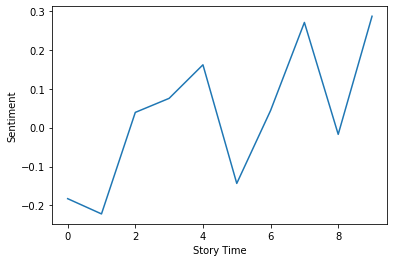

In [34]:
#plots average sentiment score over the course of the story
plt.plot(story_scores)
plt.xlabel('Story Time')
plt.ylabel('Sentiment')

In [ ]:
#clean titles for bigram detection
#def clean_titles(series):
    #lowered = series.lower()
    #tokenized = " ".join([" ".join(nltk.word_tokenize(title)) for title in nltk.sent_tokenize(str(lowered))]).split()
    #return tokenized
#birth_stories_df['cleaned title'] = birth_stories_df['title'].apply(clean_titles)
#birth_stories_df